In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Thesis Resources/dataset/Sql_Injection/sqliv2.csv",encoding="utf-16")
df.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1


In [ ]:
X = df.drop(['Label'],axis='columns')
Y = df['Label']

In [ ]:
Y.value_counts()

0    22305
1    11456
Name: Label, dtype: int64

In [ ]:
import pandas as pd
df2 = pd.read_csv("/content/drive/MyDrive/Thesis Resources/dataset/Sql_Injection/sqli.csv",encoding="utf-16")
df2.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [ ]:
X2 = df2.drop(['Label'],axis='columns')
Y2 = df2['Label']

In [ ]:
Y2.value_counts()

0    3072
1    1128
Name: Label, dtype: int64

In [ ]:
df_merged = pd.concat([df, df2],ignore_index=True )
df_merged

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


In [ ]:
X3 = df_merged.drop(['Label'],axis='columns')
Y3 = df_merged['Label']

In [ ]:
Y3.value_counts()

0    25377
1    12584
Name: Label, dtype: int64

In [ ]:
df_merged.to_csv('SQL_merged_ds.csv')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

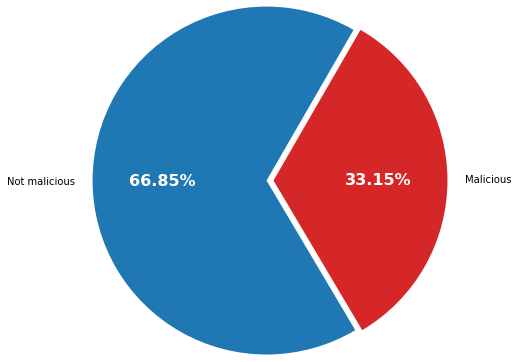

In [ ]:
explode1 = (0, 0.08)
exp_labels=["Not malicious","Malicious"]
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(Y3.value_counts(),explode= explode1, labels=exp_labels,autopct='%0.2f%%',radius=2,
        shadow=False,startangle=60, colors=('tab:blue', 'tab:red'))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':16})
plt.show()